# IETF Attendance using `ietfdata` library and the Datatracker

We can produce similar graphs, more easily with more data and less code, using data stored in the IETF Datatracker and accessed using `ietfdata`.

In [109]:
from ietfdata.datatracker     import *
from ietfdata.datatracker_ext import *
import pandas as pd
import matplotlib.pyplot as plt
import dataclasses

In [ ]:
datatracker = DataTracker()

meetings = datatracker.meetings(meeting_type = datatracker.meeting_type(MeetingTypeURI('/api/v1/name/meetingtypename/ietf/')))
full_ietf_meetings = list(meetings)

In [42]:
ietf_meetings = []
for meeting in full_ietf_meetings:
    meetingd = dataclasses.asdict(meeting)
    meetingd['meeting_obj'] = meeting
    meetingd['num'] = int(meeting.number)
    ietf_meetings.append(meetingd)    

In [47]:
meetings_df = pd.DataFrame.from_records(ietf_meetings)

In [39]:
meeting110 = full_ietf_meetings[1]

One way to get the registration count for a meeting is to download every individual's meeting registration and count them. (We don't have to do this regularly, because the datatracker actually provides counts and I've confirmed they are the same.)

In [16]:
dt = DataTrackerExt()
regs = dt.meeting_registrations(meeting=meeting110)

In [25]:
registrations110 = list(regs)

In [27]:
len(registrations110)

1156

First, we can make a classic figure, looking at the attendance of all (numbered) IETF meetings, from the 1980s until today.

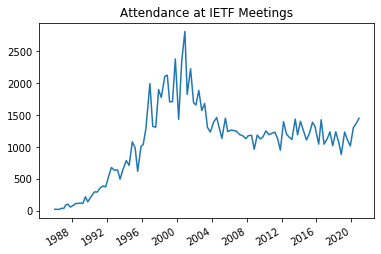

In [71]:
axes = meetings_df.plot(
    x='date',
    y='attendees',
    kind='line',
    legend=False,
    title='Attendance at IETF Meetings')
axes.set_xlabel('')
plt.show()

Do the recent virtual meetings especially stand out?

In [94]:
meetings_df['virtual'] = meetings_df.apply(lambda row: 'virtual' if row['city'] in ['Online', 'Virtual'] else 'inperson', axis=1)

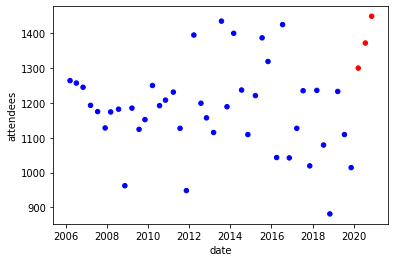

In [104]:
df = meetings_df[meetings_df['date'] > datetime(2006,1,1,0,0)]
df.plot.scatter(x='date',
       y='attendees',
       c=df['virtual'].map({'virtual':'red', 'inperson':'blue'})
)

In [149]:
meetings_df[:10]

,resource_uri,id,type,country,city,venue_name,venue_addr,date,days,time_zone,...,break_area,reg_area,proceedings_final,show_important_dates,attendees,updated,meeting_obj,num,registration_count,virtual
0,"{'uri': '/api/v1/meeting/meeting/1383/', 'para...",1383,"{'uri': '/api/v1/name/meetingtypename/ietf/', ...",US,San Francisco,,,2021-07-24,7,America/Los_Angeles,...,,,False,False,NaN,1970-01-01 00:00:00-08:00,Meeting(resource_uri=MeetingURI(uri='/api/v1/m...,111,0.0,inperson
1,"{'uri': '/api/v1/meeting/meeting/1308/', 'para...",1308,"{'uri': '/api/v1/name/meetingtypename/ietf/', ...",CZ,Online,Online,,2021-03-08,5,Europe/Prague,...,,,False,True,NaN,2021-03-01 10:18:25-08:00,Meeting(resource_uri=MeetingURI(uri='/api/v1/m...,110,1160.0,virtual
2,"{'uri': '/api/v1/meeting/meeting/1002/', 'para...",1002,"{'uri': '/api/v1/name/meetingtypename/ietf/', ...",TH,Online,,,2020-11-14,7,Asia/Bangkok,...,,Gather,True,True,1449.0,2021-01-14 10:26:53-08:00,Meeting(resource_uri=MeetingURI(uri='/api/v1/m...,109,1449.0,virtual
3,"{'uri': '/api/v1/meeting/meeting/1003/', 'para...",1003,"{'uri': '/api/v1/name/meetingtypename/ietf/', ...",ES,Online,,,2020-07-25,7,UTC,...,,Gather.Town,True,True,1372.0,2020-07-26 13:02:01-07:00,Meeting(resource_uri=MeetingURI(uri='/api/v1/m...,108,1372.0,virtual
4,"{'uri': '/api/v1/meeting/meeting/1004/', 'para...",1004,"{'uri': '/api/v1/name/meetingtypename/ietf/', ...",CA,Virtual,,,2020-03-21,7,UTC,...,,,True,True,1300.0,2020-03-19 12:05:09-07:00,Meeting(resource_uri=MeetingURI(uri='/api/v1/m...,107,1300.0,virtual
5,"{'uri': '/api/v1/meeting/meeting/882/', 'param...",882,"{'uri': '/api/v1/name/meetingtypename/ietf/', ...",SG,Singapore,Raffles City Convention Centre,80 Bras Basah Road\r\nSingapore 189673,2019-11-16,7,Asia/Singapore,...,Stamford & Fairmont Ballroom Foyers,Convention Foyer,True,True,1014.0,2019-11-16 18:58:36-08:00,Meeting(resource_uri=MeetingURI(uri='/api/v1/m...,106,1013.0,inperson
6,"{'uri': '/api/v1/meeting/meeting/881/', 'param...",881,"{'uri': '/api/v1/name/meetingtypename/ietf/', ...",CA,Montreal,Fairmont Queen Elizabeth Montreal,"900 René-Lévesque Blvd W, Montreal, QC H3B 4A5...",2019-07-20,7,America/New_York,...,Convention Floor Foyer,Square Dorchester,True,True,1109.0,2019-07-31 13:21:09-07:00,Meeting(resource_uri=MeetingURI(uri='/api/v1/m...,105,1109.0,inperson
7,"{'uri': '/api/v1/meeting/meeting/866/', 'param...",866,"{'uri': '/api/v1/name/meetingtypename/ietf/', ...",CZ,Prague,Hilton Prague,Pobřežní 1\r\n186 00 Praha 8-Florenc\r\nCzech ...,2019-03-23,7,Europe/Prague,...,Congress Hall Foyer,Congress Hall Foyer,True,True,1233.0,2019-03-24 06:28:59-07:00,Meeting(resource_uri=MeetingURI(uri='/api/v1/m...,104,1233.0,inperson
8,"{'uri': '/api/v1/meeting/meeting/805/', 'param...",805,"{'uri': '/api/v1/name/meetingtypename/ietf/', ...",TH,Bangkok,Bangkok Marriott Marquis Queen's Park,"199 Sukhumvit Sol 22, Klong Ton, Klong Toey\r\...",2018-11-03,7,Asia/Bangkok,...,2nd and 7th Floor Foyers,2nd Floor Foyer,True,True,881.0,2019-01-22 12:15:00-08:00,Meeting(resource_uri=MeetingURI(uri='/api/v1/m...,103,881.0,inperson
9,"{'uri': '/api/v1/meeting/meeting/772/', 'param...",772,"{'uri': '/api/v1/name/meetingtypename/ietf/', ...",CA,Montreal,Fairmont Queen Elizabeth Montreal,"900 René-Lévesque Blvd W\r\nMontreal, QC H3B 4...",2018-07-14,7,America/Toronto,...,Convention Floor Foyer,Mezzanine,True,True,1079.0,2018-07-18 08:58:52-07:00,Meeting(resource_uri=MeetingURI(uri='/api/v1/m...,102,1079.0,inperson


Do the country or affiliation of participants differ for the recent virtual meetings? (Or on where the meeting is physically located?)

This will construct a dataframe of every attendee's registration at every meeting. (Downloading this data takes a while!)

In [111]:
meeting_attendees_df = pd.DataFrame()
for meeting in ietf_meetings:
    if meeting['num'] > 72:
        registrations = dt.meeting_registrations(meeting=meeting['meeting_obj'])
        df = pd.DataFrame.from_records([dataclasses.asdict(x) for x in list(registrations)])
        df['num'] = meeting['num']
        meeting_attendees_df = meeting_attendees_df.append(df)

In [112]:
meeting_attendees_df

,num,resource_uri,affiliation,attended,country_code,email,first_name,id,last_name,meeting,person,reg_type,ticket_type
0,110,{'uri': '/api/v1/stats/meetingregistration/463...,,False,GB,james.ietf@gmail.com,James,46308.0,Gruessing,"{'uri': '/api/v1/meeting/meeting/1308/', 'para...","{'uri': '/api/v1/person/person/126667/', 'para...",remote hackathon,
1,110,{'uri': '/api/v1/stats/meetingregistration/463...,Akamai,False,US,mbishop@evequefou.be,Michael,46309.0,Bishop,"{'uri': '/api/v1/meeting/meeting/1308/', 'para...","{'uri': '/api/v1/person/person/116439/', 'para...",remote,full_week_pass
2,110,{'uri': '/api/v1/stats/meetingregistration/463...,Futurewei Technologies,False,US,barryleiba@computer.org,Barry,46310.0,Leiba,"{'uri': '/api/v1/meeting/meeting/1308/', 'para...","{'uri': '/api/v1/person/person/21684/', 'param...",remote,full_week_pass
3,110,{'uri': '/api/v1/stats/meetingregistration/463...,"Vigil Security, LLC",False,US,housley@vigilsec.com,Russell,46311.0,Housley,"{'uri': '/api/v1/meeting/meeting/1308/', 'para...","{'uri': '/api/v1/person/person/5376/', 'params...",remote,full_week_pass
4,110,{'uri': '/api/v1/stats/meetingregistration/463...,IETF LLC,False,US,ghwood@ietf.org,Greg,46312.0,Wood,"{'uri': '/api/v1/meeting/meeting/1308/', 'para...","{'uri': '/api/v1/person/person/120314/', 'para...",remote,full_week_pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,73,{'uri': '/api/v1/stats/meetingregistration/213...,Cisco Systems,True,US,mcgrew@cisco.com,David,2139.0,McGrew,"{'uri': '/api/v1/meeting/meeting/73/', 'params...",None,,
958,73,{'uri': '/api/v1/stats/meetingregistration/214...,Cisco,True,US,chmetz@cisco.com,Chris,2140.0,Metz,"{'uri': '/api/v1/meeting/meeting/73/', 'params...",None,,
959,73,{'uri': '/api/v1/stats/meetingregistration/214...,Cisco Systems,True,US,ashokn@cisco.com,Ashok,2141.0,Narayanan,"{'uri': '/api/v1/meeting/meeting/73/', 'params...",None,,
960,73,{'uri': '/api/v1/stats/meetingregistration/214...,Telchemy,True,US,alan.d.clark@telchemy.com,Alan,2142.0,Clark,"{'uri': '/api/v1/meeting/meeting/73/', 'params...",None,,


In [113]:
grouped = meeting_attendees_df.groupby(['num','country_code'])

In [137]:
country_ordering=grouped.size().unstack().sum(0).sort_values(ascending=False).index.values

In [140]:
reordered = grouped.size().unstack().reindex(columns=country_ordering)

In [165]:
virtual_nums = list(meetings_df[meetings_df['virtual']=='virtual']['num'])

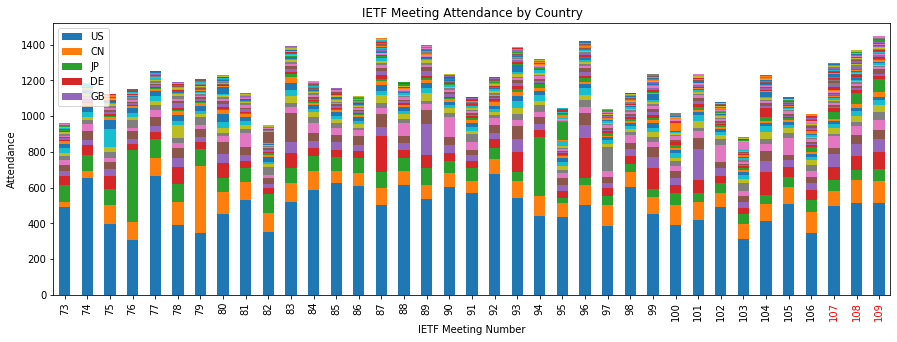

In [166]:
fig, ax = plt.subplots(figsize=(15,5))
reordered.iloc[0:-1].plot( # exclude the last meeting, 110, which hasn't happened yet
    kind='bar',
    stacked=True,
    legend=False,
    ax = ax
)
ahandles, labels = ax.get_legend_handles_labels()
ax.legend(ahandles[:5], labels[:5], loc='upper left')
ax.set_xlabel('IETF Meeting Number')
[t.set_color('red') for t in ax.xaxis.get_ticklabels() if int(t.get_text()) in virtual_nums]
ax.set_ylabel('Attendance')
ax.set_title('IETF Meeting Attendance by Country')
plt.show()

In [167]:
fig.savefig('graphs/attendance-by-country.png',dpi=300)

The virtual meetings have modestly higher attendance than recent meetings. The proportions by country are not obviously different in the virtual meetings, but there may be less variation of the proportion of attendance based on where the meeting is physically located. (That is, so far we don't see the big swings in US, Chinese, Japanese or German attendance, as we did when the meeting was physically located in the US, China, Japan or Europe.)

We can also visualize the stated affiliations of the attendees, although the number of affiliations is much more diverse and messier than the country data.

In [168]:
aff_grouped = meeting_attendees_df.groupby(['num','affiliation'])
aff_grouped.size()

num  affiliation                                                   
73                                                                     96
     ! j                                                                1
     .MN Registry, Datacom                                              1
     .it ccTLD Registry                                                 1
     .se                                                                1
                                                                       ..
110  the China Academy of Information and Communications Technology     1
     universidad autonoma de madrid                                     1
     vanderstok consultancy                                             1
     ไทย                                                                1
     고려대학교                                                              1
Length: 21374, dtype: int64

In [188]:
size_sorted = aff_grouped.size().sort_values(ascending=False).sort_index(level='num', sort_remaining=False)

In [196]:
size_sorted.reset_index().groupby('num').head()

,num,affiliation,0
0,73,,96
1,73,Cisco Systems,32
2,73,Alcatel-Lucent,24
3,73,Cisco,24
4,73,Ericsson,17
...,...,...,...
20755,110,,141
20756,110,Cisco,29
20757,110,Huawei,27
20758,110,Juniper Networks,20


In [198]:
aff_ordering=aff_grouped.size().unstack().sum(0).sort_values(ascending=False).index.values

In [200]:
aff_reordered = aff_grouped.size().unstack().reindex(columns=aff_ordering)

In [210]:
aff_ordering[1:50]

array(['Cisco Systems', 'Cisco', 'Ericsson', 'Huawei', 'Juniper Networks',
       'Google', 'Internet Society', 'Alcatel-Lucent', 'Nokia',
       'Huawei Technologies', 'Microsoft', 'ETRI', 'ICANN', 'NTT',
       'Deutsche Telekom', 'NIST', 'RIPE NCC', 'Comcast', 'ISC',
       'Mozilla', 'China Mobile', 'Verizon', 'cisco', 'Oracle', 'AT&T',
       'NTT Communications', 'Orange', 'Tsinghua University',
       'ZTE Corporation', 'NEC', 'Verisign', 'JPRS',
       'Akamai Technologies', 'Huawei Technologies Co., Ltd.',
       'Nokia Siemens Networks', 'BT', 'Apple', 'ZTE', 'NLnet Labs',
       'APNIC', 'Cisco Systems, Inc.', 'CNNIC', 'Facebook', 'CableLabs',
       'NetApp', 'Deutsche Telekom AG', 'Ericsson AB', 'Ciena',
       'Telecom Italia'], dtype=object)

In [217]:
aff_reordered = aff_grouped.size().unstack().reindex(columns=aff_ordering[1:20])

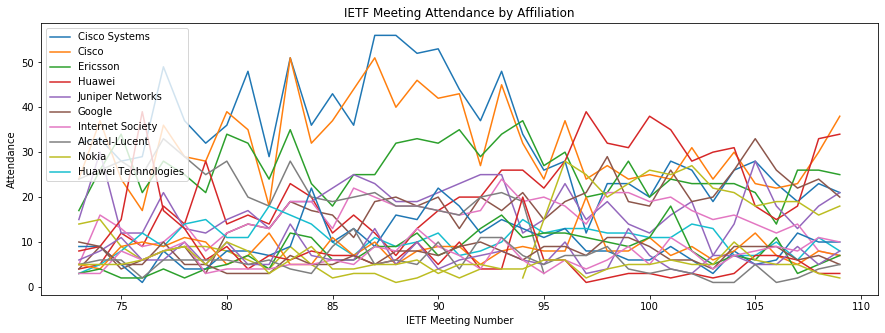

In [219]:
fig, ax = plt.subplots(figsize=(15,5))
aff_reordered[:-1].plot( # exclude the last meeting, 110, which hasn't happened yet
    kind='line',
    legend=False,
    ax = ax
)
ahandles, labels = ax.get_legend_handles_labels()
ax.legend(ahandles[:10], labels[:10], loc='upper left')
ax.set_xlabel('IETF Meeting Number')
#[t.set_color('red') for t in ax.xaxis.get_ticklabels() if int(t.get_text()) in virtual_nums]
ax.set_ylabel('Attendance')
ax.set_title('IETF Meeting Attendance by Affiliation')
plt.show()

These attendance numbers by large companies are significant, but recall that the average meeting has over 1000 participants, so this excludes the vast majority of participants, and unaffiliated participants are always the largest single group (not shown in this graph).

<div class="alert alert-info"><b>TODO</b>
Some entity resolution to handle duplicates is necessary to make this chart actually useful (for both Cisco and Huawei, in particular, but it applies to many affiliations).</div>

In [220]:
fig.savefig('graphs/attendance-by-affiliation.png',dpi=300)